In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import cv2
import pandas as pd 
from sklearn.cluster import KMeans
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
!apt-get update
!apt-get upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [74.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/mar

In [4]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
pkg-config is already the newest version (0.29.1-0ubuntu2).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libavcodec-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libswscale-dev set to manually installed.
The following package was auto

In [5]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [6]:

!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [7]:
!apt-get install libopencv-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [8]:
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 10179 (delta 7), reused 11 (delta 3), pack-reused 10157
Receiving objects: 100% (10179/10179), 10.12 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (6819/6819), done.


In [9]:
!apt-get install vim


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 5 not upgraded.
Need to get 6,723 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 xxd amd64 2:8.0.1453-1ubuntu1 [49.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 vim-common all 2:8.0.1453-1ubuntu1 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 vim-runtime all 2:8.0.1453-1

In [10]:
%cd darknet

/content/darknet


In [11]:
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
--2019-05-22 06:05:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  3.20MB/s    in 21s     

2019-05-22 06:06:12 (11.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [12]:
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile		     yolov3.weights
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md


In [0]:
!vim Makefile

7="Makefile" 166L, 4957C▽  [>c]10;?]11;?GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Coress) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
          -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)1,1Top>8Vim: Caught deadly signal TERM

Vim: Finished.
^C


In [13]:
!ls
%cd ../
!ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile		     yolov3.weights
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
/content
darknet  gdrive  sample_data


In [14]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 5 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base

In [15]:
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

5 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2019-05-22 06:06:58--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?X3uDU8fiu9GxkRBDemZCMy7bv0IcSHxsyOBkGwgQFcq5hK0Hhr_WRU7TTq_yaZ-ep9zow-p9egvszLkBjvxajsA22JPJ3TGSqbV7P5qBQxaU47jFHiUpbb-QFLeLUGW5Vdu5bOgxoF6o39FkyQsWUDUhFCL5D4pdA1YsWCkivv28lCfMpVSeSQToCT4y_yZe_dRrHePdPtxAIPZmwC_Aajaf2A [following]
--2019-05-22 06:06:59--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?X3uDU8fiu9GxkRBDemZCMy7

In [16]:

#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [17]:
%cd darknet
!make

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: At global scope:
./src/image_opencv.cpp:420:14: warning: ‘float get_pixel(image, int, int, int)’ defined but not used [-Wunused-function]
 static float get_pixel(image m, int x, int y, int c)
              ^
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused

In [18]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty      CMakeLists.txt	      image_yolov3.sh	     results
appveyor.yml  CMakeSettings.json      include		     scripts
backup	      darknet		      json_mjpeg_streams.sh  src
build	      DarknetConfig.cmake.in  LICENSE		     video_v2.sh
build.ps1     darknet.py	      Makefile		     video_yolov3.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     yolov3.weights
cfg	      data		      obj
cmake	      image_yolov2.sh	      README.md
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 B

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [20]:
!pwd

/content/darknet


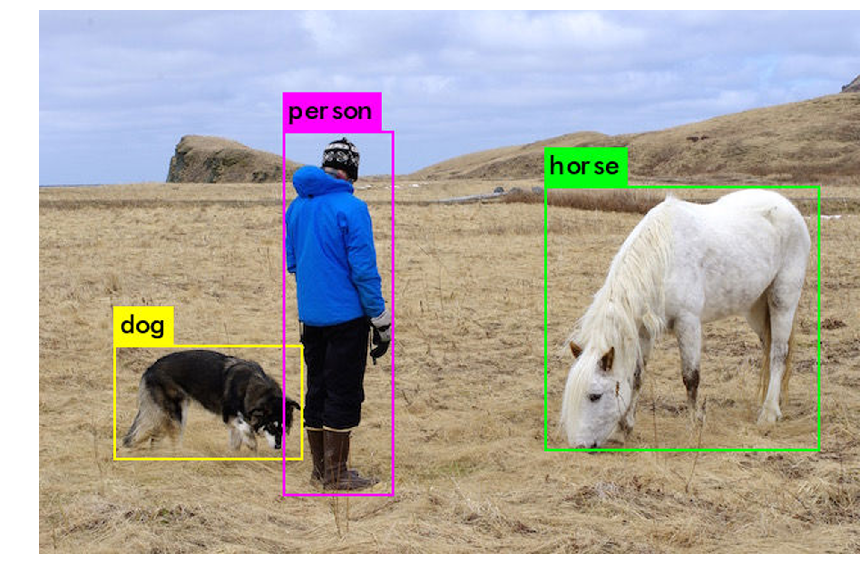

In [21]:
imShow('predictions.jpg')

In [22]:
!pwd

/content/darknet


In [44]:
%cd content

/content


In [0]:
!rm -r darknet/build/darknet/x64/data/obj


In [0]:
!mkdir darknet/build/darknet/x64/data/obj

In [0]:
%cd ..

/content


In [0]:
import os
from shutil import copy

In [0]:
pathforsmallimages = 'gdrive/My Drive/64 sized images'
pathforcroppedimages = 'gdrive/My Drive/real_images'
finalpath = 'gdrive/My Drive/allimages/'

In [0]:
for image in os.listdir(pathforcroppedimages):
  copy(os.path.join(pathforcroppedimages,image), finalpath)

In [0]:
for image in os.listdir(pathforsmallimages):
  copy(os.path.join(pathforsmallimages,image), finalpath)

In [0]:
pathtoput = 'build/darknet/x64/data/obj/'
!touch darknet/build/darknet/x64/data/train.txt

In [0]:
file = open('darknet/build/darknet/x64/data/train.txt','w')
for img in os.listdir(finalpath):
  imgpath = pathtoput + img + '\n'
  file.write(imgpath)

In [28]:
! apt-get install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 1s (341 kB/s)
Selecting previously unselected package dos2unix.
(Reading database ... 157139 files and directories currently installed.)
Preparing to unpack .../dos2unix_7.3.4-3_amd64.deb ...
Unpacking dos2unix (7.3.4-3) ...
Setting up dos2unix (7.3.4-3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [31]:
! dos2unix darknet/build/darknet/x64/data/train.txt darknet/build/darknet/x64/data/train.txt

dos2unix: converting file darknet/build/darknet/x64/data/train.txt to Unix format...
dos2unix: converting file darknet/build/darknet/x64/data/train.txt to Unix format...


In [32]:
! dos2unix darknet/build/darknet/x64/data/obj.names darknet/build/darknet/x64/data/obj.names
! dos2unix darknet/build/darknet/x64/data/obj.data darknet/build/darknet/x64/data/obj.data

dos2unix: converting file darknet/build/darknet/x64/data/obj.names to Unix format...
dos2unix: converting file darknet/build/darknet/x64/data/obj.names to Unix format...
dos2unix: converting file darknet/build/darknet/x64/data/obj.data to Unix format...
dos2unix: converting file darknet/build/darknet/x64/data/obj.data to Unix format...


In [33]:
! dos2unix darknet/build/darknet/x64/yolov3-tiny-obj.cfg darknet/build/darknet/x64/yolov3-tiny-obj.cfg

dos2unix: converting file darknet/build/darknet/x64/yolov3-tiny-obj.cfg to Unix format...
dos2unix: converting file darknet/build/darknet/x64/yolov3-tiny-obj.cfg to Unix format...


In [0]:
images=[]
pathforimages = 'gdrive/My Drive/10_img_post_cropped/'
for img in os.listdir(pathforimages):
  if 'crp' in img:
    images.append(img)
images = sorted(images)
temp = images[1]
del images[1]
images.append(temp)

In [0]:
compimages=[]
for img in images:
  compimages.append(cv2.imread(os.path.join(pathforimages,img),1))

In [0]:
!pwd

/content


In [0]:
for k in range(len(compimages)):
  i=64
  height = compimages[k].shape[0]
  width = compimages[k].shape[1]
  while(i<height):
    j=64
    while(j<width):
      filename = str(k+1)+'from'+str(i-64)+str(j-64) + '.txt'
      if not os.path.isfile('gdrive/My Drive/small_images/'+filename):
        f= open('gdrive/My Drive/small_images/'+filename,"w+")  
      j+=64
    i+=64

In [0]:
pathforsmalltext = 'gdrive/My Drive/small_images'
pathforbigtext = 'gdrive/My Drive/crp_images'

In [0]:
finaltextpath = 'gdrive/My Drive/alltext/'
for fi in os.listdir(pathforbigtext):
  copy(os.path.join(pathforbigtext,fi), finaltextpath)

In [0]:
for fi in os.listdir(pathforsmalltext):
  copy(os.path.join(pathforsmalltext,fi), finaltextpath)

In [0]:
pathforallimages = 'gdrive/My Drive/allimages'
pathforalltext = 'gdrive/My Drive/alltext'
pathfortextandimage = 'gdrive/My Drive/imageswithtext/'


In [54]:
%cd gdrive/My Drive/alltext

/content/gdrive/My Drive/alltext


In [56]:
! find . -type f -print0 | xargs -0 dos2unix

dos2unix: converting file ./10from1922176.txt to Unix format...
dos2unix: converting file ./10from1922240.txt to Unix format...
dos2unix: converting file ./10from1922304.txt to Unix format...
dos2unix: converting file ./10from1922368.txt to Unix format...
dos2unix: converting file ./10from1922432.txt to Unix format...
dos2unix: converting file ./10from1922496.txt to Unix format...
dos2unix: converting file ./10from1922560.txt to Unix format...
dos2unix: converting file ./10from1922624.txt to Unix format...
dos2unix: converting file ./10from1922688.txt to Unix format...
dos2unix: converting file ./10from1922752.txt to Unix format...
dos2unix: converting file ./10from1922816.txt to Unix format...
dos2unix: converting file ./10from1922880.txt to Unix format...
dos2unix: converting file ./10from1922944.txt to Unix format...
dos2unix: converting file ./10from1923008.txt to Unix format...
dos2unix: converting file ./10from1923072.txt to Unix format...
dos2unix: converting file ./10from192313

In [61]:
% cd darknet

/content/darknet


In [60]:
for file in os.listdir(pathforalltext):
  copy(os.path.join(pathforalltext,file), pathfortextandimage)
print("text done")

text done


In [53]:
for file in os.listdir(pathforallimages):
  copy(os.path.join(pathforallimages,file), pathfortextandimage)
print("images done")

images done


In [65]:
!pwd

/content


In [63]:
%cd ..

/content


In [0]:
pathforimagesandtext = 'gdrive/My Drive/imageswithtext'
for file in os.listdir(pathforimagesandtext):
  copy(os.path.join(pathforimagesandtext,file), 'darknet/build/darknet/x64/data/obj/')

In [66]:
%cd darknet

/content/darknet


In [0]:
! ./darknet detector calc_anchors build/darknet/x64/data/obj.data -num_of_clusters 6 -width 416 -height 416


 num_of_clusters = 6, width = 416, height = 416 
 read labels from 5569 images 
 loaded 	 image: 2129 	 box: 302

Wrong label: build/darknet/x64/data/obj/7from0448.txt - j = 0, x = 0.765625, y = 0.000000, width = 0.453125, height = 0.000000 
 loaded 	 image: 2390 	 box: 339

Wrong label: build/darknet/x64/data/obj/7from2560.txt - j = 0, x = 0.000000, y = 0.742188, width = 0.000000, height = 0.375000 
 loaded 	 image: 2391 	 box: 340

Wrong label: build/darknet/x64/data/obj/7from2560.txt - j = 1, x = 0.000000, y = 0.941406, width = 0.000000, height = 0.117188 
 loaded 	 image: 2451 	 box: 356

Wrong label: build/darknet/x64/data/obj/7from3200.txt - j = 0, x = 0.000000, y = 0.203125, width = 0.000000, height = 0.265625 
 loaded 	 image: 2453 	 box: 357

Wrong label: build/darknet/x64/data/obj/7from3200.txt - j = 1, x = 0.000000, y = 0.042969, width = 0.000000, height = 0.085938 
 loaded 	 image: 3149 	 box: 426

Wrong label: build/darknet/x64/data/obj/5from0640.txt - j = 0, x = 0.929688

In [62]:
! ./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [36]:
%cd darknet

/content/darknet


In [69]:
! ./darknet detector train build/darknet/x64/data/obj.data build/darknet/x64/yolov3-tiny-obj.cfg yolov3-tiny.conv.15 -dont_show

yolov3-tiny-obj
layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x 

In [0]:
!export PATH=/usr/local/cuda/bin:$PATH
!export LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH

In [0]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [0]:
a = [1,2,3,46,5,6]
max(a[:1])

1